In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from data import data_preprocess
from evaluation import metrics
from model import concrete_dropout, deep_ensemble

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('kin8nm')

In [3]:
deep_ensemble_model = deep_ensemble.train_model(x_train, y_train, n_epoch = 500, hidden_layers = [100, 100, 100], learning_rate = 0.001, exp_decay = .995)

initial loss:  0.3121142089366913
final loss:  -4.009535312652588
initial loss:  0.40408551692962646
final loss:  -4.100761413574219
initial loss:  0.37428680062294006
final loss:  -4.2947516441345215
initial loss:  0.5684539079666138
final loss:  -4.2379536628723145
initial loss:  0.4930475056171417
final loss:  -4.201351642608643


Deep ensemble test MAPE:  0.11662097
Deep ensemble test RMSE:  0.08225828


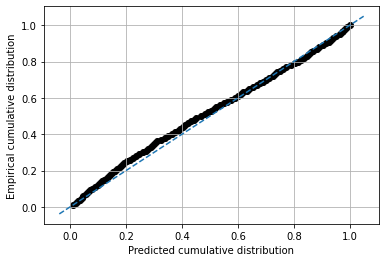

Deep ensemble test calibration error when step size is 0.001:  0.720095167240037
Deep ensemble test calibration error when step size is 0.01:  0.07202564444720673
Deep ensemble test calibration error when step size is 0.1:  0.0067797655824428146


In [4]:
mean_pred, var_pred = deep_ensemble_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()

print('Deep ensemble test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('Deep ensemble test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('Deep ensemble test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('Deep ensemble test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('Deep ensemble test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

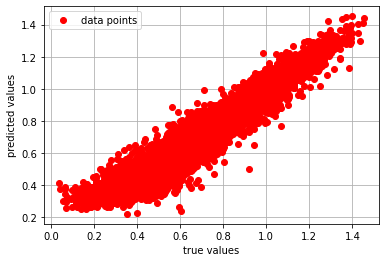

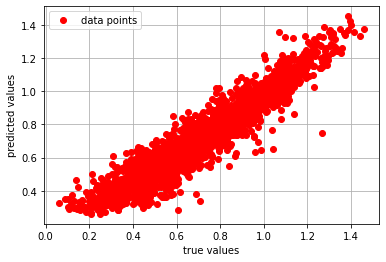

In [16]:
plt.plot(y_train.detach().numpy(), deep_ensemble_model(x_train)[0].detach().numpy().squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

plt.plot(y_test.detach().numpy(), mean_pred.squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

In [10]:
concrete_dropout_model = concrete_dropout.train_model(x_train, y_train, n_epoch = 500, n_features = 1000, learning_rate = 0.001)

final loss:  -7.525213718414307


Concrete dropout test MAPE:  0.12223801
Concrete dropout test RMSE:  0.08795939


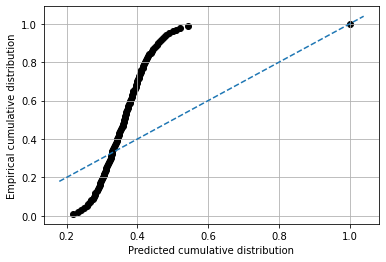

Concrete dropout test calibration error when step size is 0.001:  66.6792202508692
Concrete dropout test calibration error when step size is 0.01:  6.573971873183466
Concrete dropout test calibration error when step size is 0.1:  0.5407591608202422


In [11]:
mean_pred, log_var_pred, _ = concrete_dropout_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = np.exp(log_var_pred.detach().numpy())

print('Concrete dropout test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('Concrete dropout test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('Concrete dropout test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('Concrete dropout test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('Concrete dropout test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

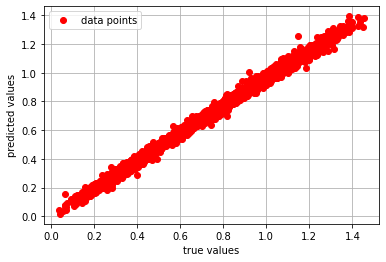

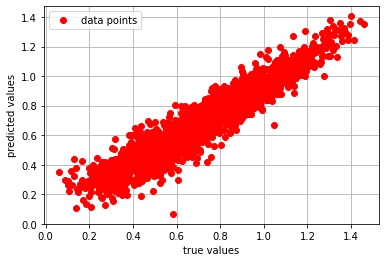

In [12]:
plt.plot(y_train.detach().numpy(), concrete_dropout_model(x_train)[0].detach().numpy().squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

plt.plot(y_test.detach().numpy(), mean_pred.squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()